In [35]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [5]:
digit = load_digits()

In [7]:
digit.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
digit.data.shape

(1797, 64)

In [9]:
print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [11]:
data = digit.data

In [13]:
data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [17]:
target = digit.target

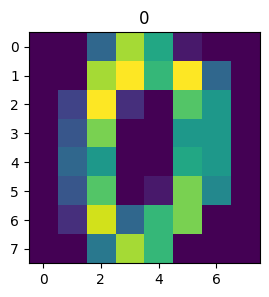

In [18]:
plt.figure(figsize=(3, 3))
plt.imshow(data[0].reshape(8, 8))
plt.title(target[0])
plt.show()

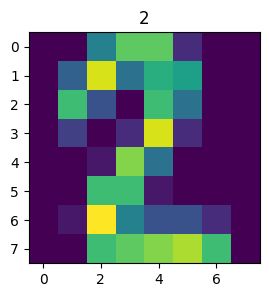

In [19]:
plt.figure(figsize=(3, 3))
plt.imshow(data[369].reshape(8, 8))
plt.title(target[369])
plt.show()

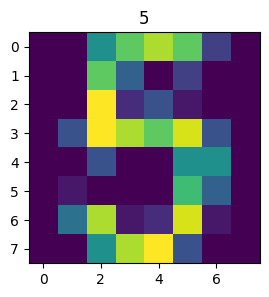

In [20]:
plt.figure(figsize=(3, 3))
plt.imshow(data[618].reshape(8, 8))
plt.title(target[618])
plt.show()

In [22]:
data[618].reshape(8, 8)

array([[ 0.,  0.,  8., 12., 14., 12.,  3.,  0.],
       [ 0.,  0., 12.,  5.,  0.,  3.,  0.,  0.],
       [ 0.,  0., 16.,  2.,  4.,  1.,  0.,  0.],
       [ 0.,  4., 16., 14., 12., 15.,  4.,  0.],
       [ 0.,  0.,  4.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  1.,  0.,  0.,  0., 11.,  5.,  0.],
       [ 0.,  6., 14.,  1.,  2., 15.,  1.,  0.],
       [ 0.,  0.,  8., 14., 16.,  4.,  0.,  0.]])

In [24]:
data[1730].reshape(8, 8)

array([[ 0.,  1.,  9., 16., 16., 12.,  1.,  0.],
       [ 0.,  0.,  7.,  8., 10., 16.,  9.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 16.,  4.,  0.],
       [ 0.,  0.,  5., 13., 13.,  3.,  0.,  0.],
       [ 0.,  0., 13., 16.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  8.,  0.,  0.],
       [ 0.,  0.,  3.,  5., 14., 15.,  0.,  0.],
       [ 0.,  0., 10., 16., 11.,  4.,  0.,  0.]])

In [25]:
target[1730]

3

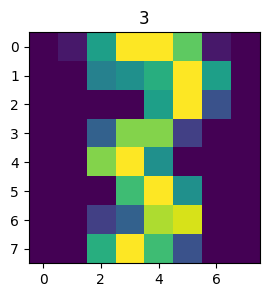

In [26]:
plt.figure(figsize=(3, 3))
plt.imshow(data[1730].reshape(8, 8))
plt.title(target[1730])
plt.show()

In [28]:
data[1730].reshape(8, 8)/16

array([[0.    , 0.0625, 0.5625, 1.    , 1.    , 0.75  , 0.0625, 0.    ],
       [0.    , 0.    , 0.4375, 0.5   , 0.625 , 1.    , 0.5625, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.5625, 1.    , 0.25  , 0.    ],
       [0.    , 0.    , 0.3125, 0.8125, 0.8125, 0.1875, 0.    , 0.    ],
       [0.    , 0.    , 0.8125, 1.    , 0.5   , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.6875, 1.    , 0.5   , 0.    , 0.    ],
       [0.    , 0.    , 0.1875, 0.3125, 0.875 , 0.9375, 0.    , 0.    ],
       [0.    , 0.    , 0.625 , 1.    , 0.6875, 0.25  , 0.    , 0.    ]])

In [31]:
X = data/16

In [32]:
X_tr, X_te, y_tr, y_te = train_test_split(X, target, random_state=34, train_size=0.7)

In [33]:
X_tr.shape

(1257, 64)

In [34]:
X_te.shape

(540, 64)

In [75]:
model = AdaBoostClassifier(n_estimators=300, estimator=DecisionTreeClassifier(max_depth=4))

In [76]:
model.fit(X_tr, y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                   n_estimators=300)

In [77]:
model.score(X_tr, y_tr)

1.0

In [78]:
y_pr = model.predict(X_te)

In [79]:
accuracy_score(y_te, y_pr)

0.9555555555555556

<Axes: >

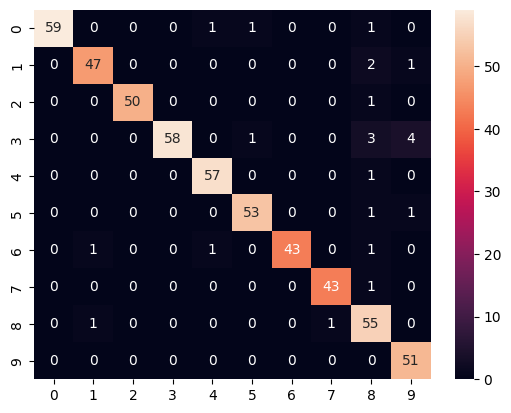

In [81]:
sns.heatmap(confusion_matrix(y_te, y_pr), annot=True)

In [82]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        62
           1       0.96      0.94      0.95        50
           2       1.00      0.98      0.99        51
           3       1.00      0.88      0.94        66
           4       0.97      0.98      0.97        58
           5       0.96      0.96      0.96        55
           6       1.00      0.93      0.97        46
           7       0.98      0.98      0.98        44
           8       0.83      0.96      0.89        57
           9       0.89      1.00      0.94        51

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

